# Exploração de Espécies Florais 🪷

### 📌  Objetivo do projeto

Este projeto realiza uma Análise Exploratória de Dados (EDA) no dataset Iris, que contém características morfológicas de três espécies de flores (Setosa, Versicolor e Virginica). 

O objetivo é entender os padrões e relações entre as variáveis — como comprimento e largura de pétalas e sépalas — para preparar o terreno para modelos de Machine Learning.

Esta análise serviu de base para um projeto posterior de classificação, onde testamos algoritmos como SVM e KNN, alcançando até 97% de acurácia em dados sem outliers e algoritmos como random forest e decision trees que alcamçaram 100% de acurácia em dados com outliers.

## 1. 📚 Preparando bibliotecas, analisando e tratando dados

### Importação de bibliotecas relevantes

In [8]:
# Importando bibliotecas essenciais para análise e visualização
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

sns.set()

Leitura do arquivo de dados:

In [10]:
dados = pd.read_csv('iris_dataset.csv')

### Tratamento de dados

In [12]:
dados.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Sabemos que não existem variáveis categoricas, apenas numéricas, o que facilita nossa análise

In [14]:
dados.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Analisando as médias, mínimos e máximos de cada coluna, nota-se que as variáveis — comprimento e largura de pétalas e sépalas — apresentam variações de grandeza semelhantes.

Isso sugere que a normalização pode não ser necessária para os modelos de Machine Learning aplicados posteriormente. Não há sinais evidentes de outliers extremos neste resumo, mas vamos confirmar isso com análises visuais mais adiante.

In [17]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


Ao verificar mais informações no dataset, confirmamos que não há dados ausentes.

Isso elimina a necessidade de tratamentos adicionais para valores inexistentes ou incoerentes, especialmente porque todas as variáveis numéricas são do tipo float, prontas para os modelos de Machine Learning.

### Removendo dados duplicados

In [21]:
# Procurando dados duplicados
dados.duplicated().sum()

3

In [22]:
# Verificando dados duplicados
dados[dados.duplicated(keep = False)]

,sepal_length,sepal_width,petal_length,petal_width
9,4.9,3.1,1.5,0.1
34,4.9,3.1,1.5,0.1
37,4.9,3.1,1.5,0.1
101,5.8,2.7,5.1,1.9
142,5.8,2.7,5.1,1.9


In [23]:
# Os dados são exatamente iguais e dado o tamanho do dataset não deve impactar significamente mantê-los

dados.drop_duplicates(inplace = True)

dados.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Após a remoção, identificamos que 3 registros duplicados foram eliminados do dataset. Considerando que o Iris possui 150 amostras, isso representa cerca de 2% dos dados, uma proporção pequena e aceitável que não deve comprometer a análise exploratória nem os modelos de Machine Learning aplicados posteriormente.

## 2. 📈 isualização geral dos dados

Com os dados limpos e sem valores ausentes ou duplicados significativos, podemos afirmar que estão prontos para a análise exploratória. Agora, vamos investigar as relações entre as variáveis — como comprimento e largura de pétalas e sépalas — e sua disposição em gráficos, preparando o terreno para insights que guiarão os modelos de Machine Learning.

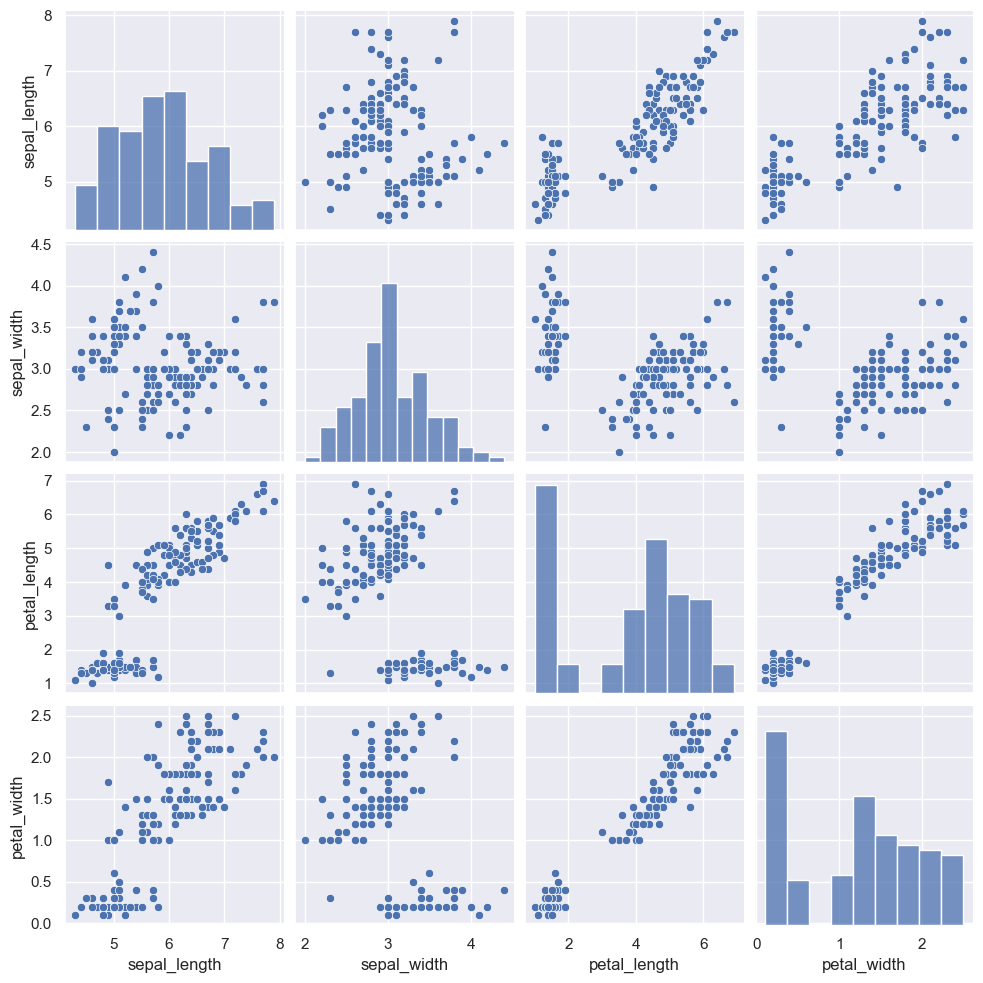

In [27]:
sns.pairplot(data = dados)

O pair plot revela a presença de alguns possíveis outliers no conjunto de dados, especialmente nas variáveis de comprimento e largura de pétalas e sépalas. Como o foco aqui é explorar e entender os dados, vamos mantê-los por enquanto e avaliar seu impacto ao final da análise. Uma abordagem mais rigorosa para tratamento de outliers será aplicada no projeto de Machine Learning (`FloralSpecies-ML`).

Ao examinar os gráficos com atenção, nota-se pelo menos um grupo bem definido, sugerindo a existência de ao menos duas espécies distintas de Iris. Isso indica uma separabilidade inicial entre as flores, mas precisamos validar essa hipótese. Para confirmar a quantidade e a consistência dos agrupamentos, vale a pena explorar métodos de clustering em seguida, como um próximo passo na análise.

## 3. 🗄️🗂️ Agrupamento de dados (clustering)

Para explorar a separabilidade dos dados e validar os agrupamentos observados no pair plot, vamos aplicar o K-Means, um método simples e confiável de clustering.

O K-Means é eficaz para este tipo de análise, lidando bem com as particularidades do processo — como a inicialização dos centróides — para encontrar os agrupamentos mais adequados ao dataset Iris.

*Lembrete:* com base na análise anterior, sabemos que existem pelo menos dois grupos distintos. Assim, vamos começar testando essa configuração inicial e ajustá-la conforme necessário.

In [34]:
# Copiando a variável para poder usar a original futuramente se necessário
clustering = dados.copy()

# Criando um objeto K-means com 2 clusters
kmeans = KMeans(2)

# Adicionando os dados
kmeans.fit(clustering)

KMeans(n_clusters=2)

Agora que temos os clusters, vamos salvar seu valor em uma coluna separada para visualizarmos no gráfico

In [36]:
clustering['Clusters'] = kmeans.fit_predict(clustering)

clustering

,sepal_length,sepal_width,petal_length,petal_width,Clusters
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


Ótimo. Agora vamos verificar os gráficos novamente com a separação dos grupos

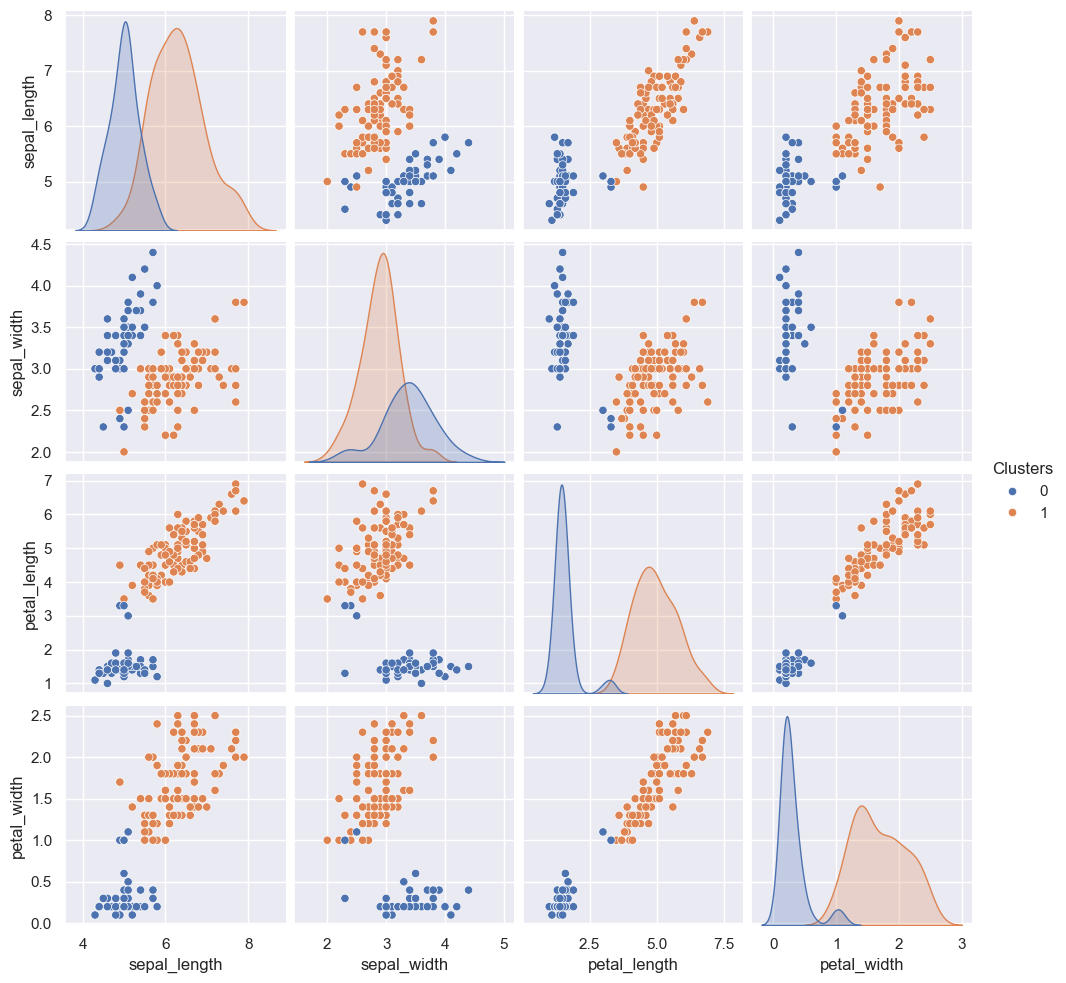

In [38]:
# Será feita a mesma visualização, mas vamos mudar as cores de acordo com a coluna dos Clusters que criamos nos dados
sns.pairplot(data = clustering, hue = 'Clusters')

Ao analisar o gráfico gerado pelo K-Means com 2 clusters, podemos concluir que existem mais de dois grupos no dataset Iris. Essa percepção é baseada em alguns pontos:

1. As distribuições mostram variações próximas às caudas, sugerindo a formação de uma terceira distribuição distinta.  

2. Há uma mistura de dados entre os grupos, indicando que dois clusters não capturam totalmente a separabilidade das espécies.  

3. De forma mais abstrata, o grupo azul se estende excessivamente, resultando em uma generalização ampla em vez de um agrupamento bem definido.

Para determinar o número ideal de clusters e refinar essa análise, vamos aplicar o método do "cotovelo" (Elbow Method) utilizando o WCSS (Within-Cluster Sum of Squares) como métrica.

## 4. 💪🏼 Método do 'Cotovelo'

O método do cotovelo é uma técnica que avalia a soma das distâncias quadradas (WCSS, *Within-Cluster Sum of Squares*) entre os pontos e seus respectivos centróides para diferentes quantidades de clusters.

Quanto menores forem essas distâncias, mais compacto e bem definido é cada grupo, ajudando a identificar o número ideal de clusters para o dataset.

#### Encontrando o WCSS

In [48]:
wcss = []

max_clusters = 10
for i in range(1, max_clusters):
    kmeans = KMeans(i)
    kmeans.fit(dados) #Vamos utilizar os dados originais, já que a variável 'clustering' possui uma coluna criada por nós
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

#### Utilizando o método do 'cotovelo'

Text(0, 0.5, 'WCSS')

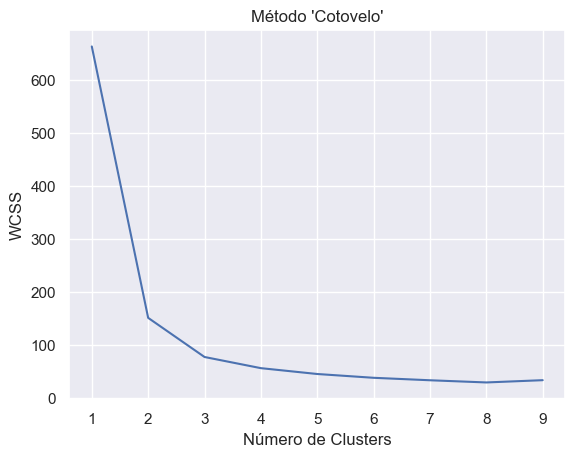

In [50]:
numero_clusters = range(1,max_clusters)
plt.plot(numero_clusters,wcss)
plt.title('Método \'Cotovelo\'')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')

#### Interpretação do Método do Cotovelo

**Como "ler" o gráfico:** o método do cotovelo mostra que quanto menor o valor do WCSS (*Within-Cluster Sum of Squares*), mais compactos e definidos são os clusters. No gráfico, confirmamos nossa análise inicial: a queda acentuada de WCSS entre 1 e 2 clusters reforça a existência de pelo menos dois grupos no dataset Iris.

Observamos também uma redução significativa de WCSS entre 2 e 3 clusters, embora a partir de 3 a diminuição se torne menos pronunciada. Isso sugere que 3 grupos podem ser o número ideal de espécies de Iris. Para validar essa hipótese, vamos visualizar os resultados do K-Means com 4 clusters e, em seguida, com 3, comparando os agrupamentos.

## 5. 🤔 Testando hipóteses 

### 4 Clusters

In [56]:
clusters_4 = dados.copy()

kmeans_4 = KMeans(4)

kmeans_4.fit(clusters_4)

KMeans(n_clusters=4)

In [57]:
clusters_4['Clusters'] = kmeans_4.fit_predict(clusters_4)

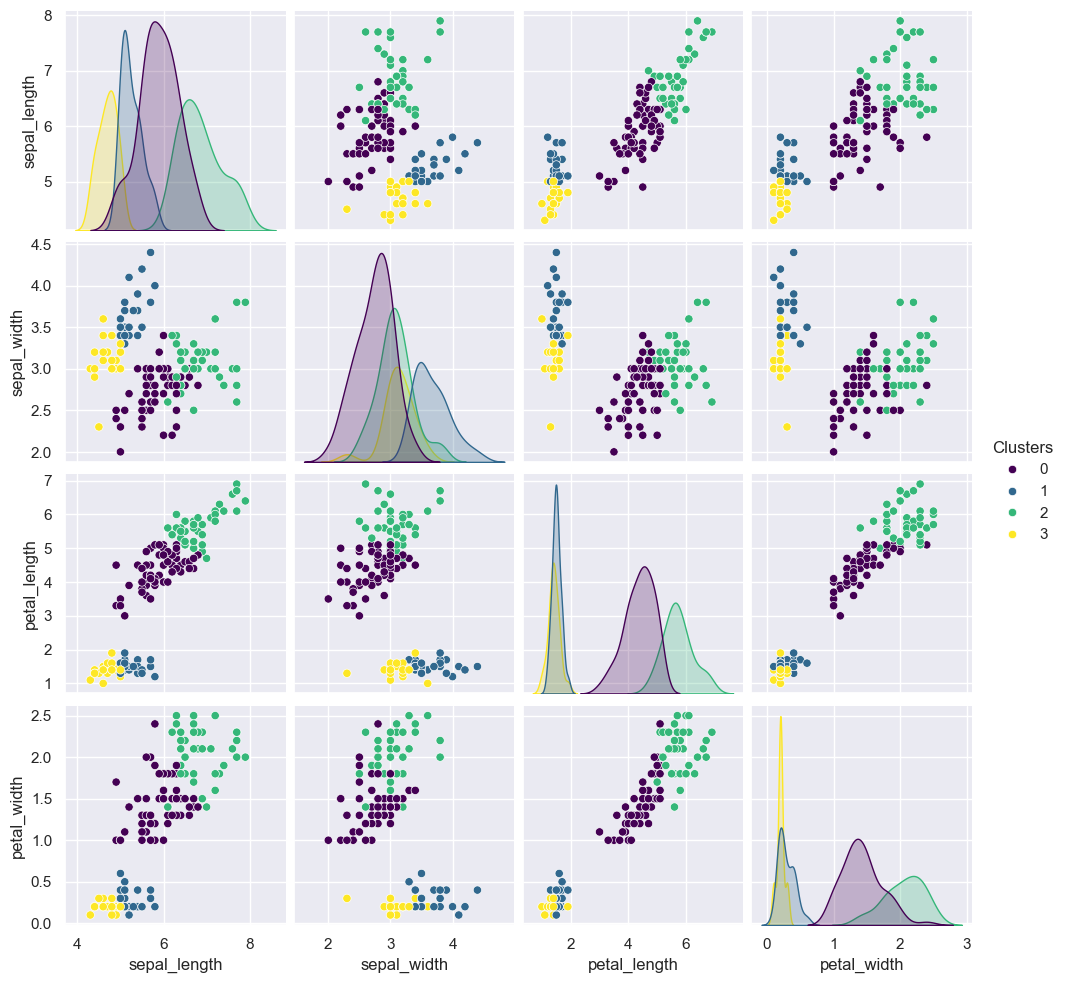

In [58]:
sns.pairplot(data = clusters_4, hue = 'Clusters', palette = 'viridis')

Ao visualizar os 4 clusters, conseguimos identificar claramente um grupo bem definido. No entanto, os outros três não parecem igualmente delimitados.

As características das flores — como comprimento e largura de pétalas e sépalas — aparecem misturadas em alguns casos, com mais de um grupo ocupando o mesmo espaço no gráfico. Isso torna difícil distinguir onde as propriedades de uma espécie terminam e outra começam. 

Dado esse resultado, vamos testar com 3 clusters, que pareceu mais promissor pelo método do cotovelo.

### 3 Clusters

In [63]:
clusters_3 = dados.copy()

kmeans_3 = KMeans(3, random_state = 42)

kmeans_3.fit(clusters_3)

KMeans(n_clusters=3, random_state=42)

In [64]:
clusters_3['Clusters'] = kmeans_3.fit_predict(clusters_3)

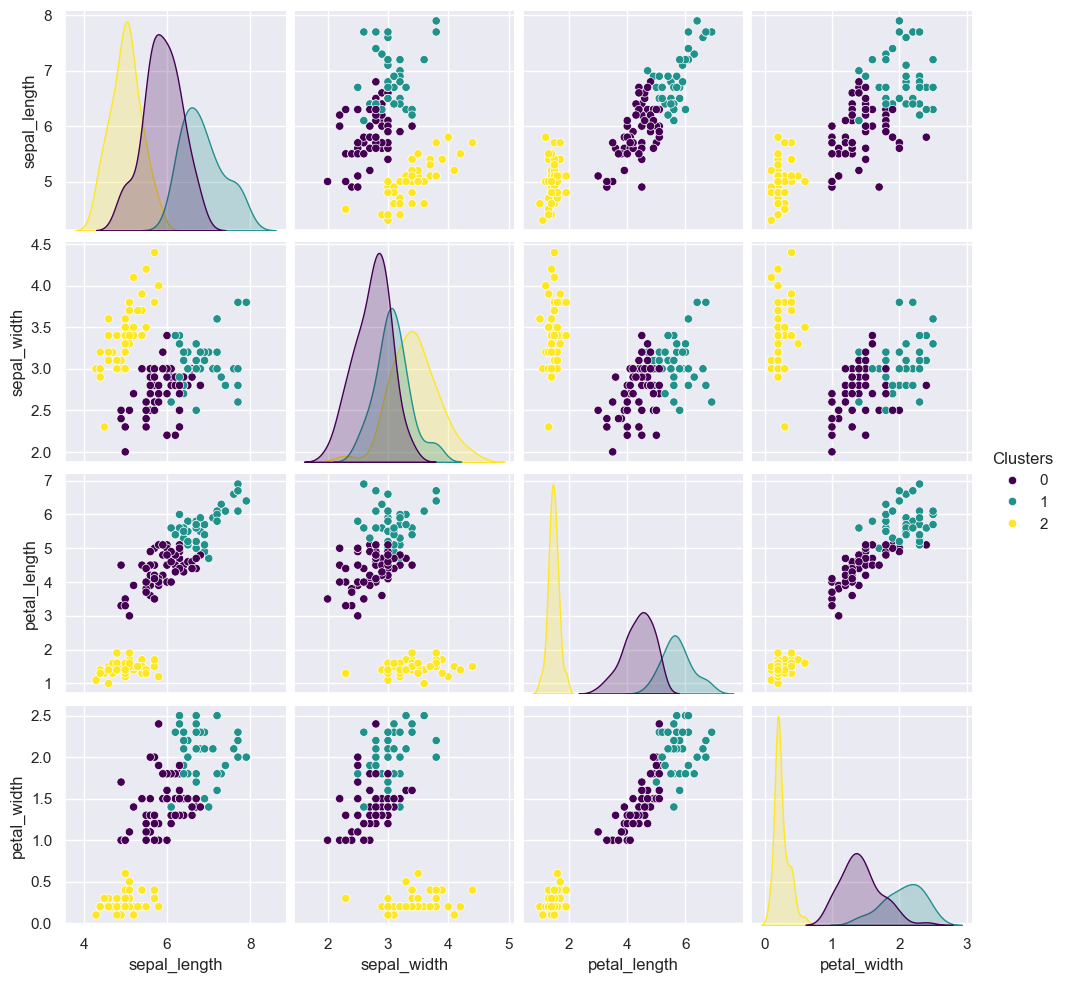

In [65]:
sns.pairplot(data = clusters_3, hue = 'Clusters', palette = 'viridis')

Com 3 clusters, ainda há alguma sobreposição de características perto dos limites entre os grupos. Apesar disso, a separação das diferentes espécies de Iris é visivelmente mais clara e definida, com cada cluster representando melhor as distinções entre as flores no dataset.

## 6. 👨🏻‍🏫 Considerações finais

Alguns dados mostraram sobreposição ou se tornaram irrelevantes ao tentar separá-los em mais de 3 grupos.

Isso sugere que a solução ideal para o dataset Iris provavelmente envolve apenas 3 clusters, correspondendo às 3 espécies de flores conhecidas. Para confirmar, comparamos nossos resultados de clustering com o dataset original, que inclui os nomes das espécies (Setosa, Versicolor e Virginica), validando a presença de exatamente 3 grupos:

In [70]:
resultado = pd.read_csv('iris_with_answers.csv')

resultado.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [71]:
# Verificando a quantidade de espécies e seus nomes
print("Quantidade de espécies: " + str(len(resultado['species'].unique())))
print("Nomes: " + str(resultado['species'].unique()))

Quantidade de espécies: 3
Nomes: ['setosa' 'versicolor' 'virginica']


#### E para finalizar vamos visualizar os gráficos

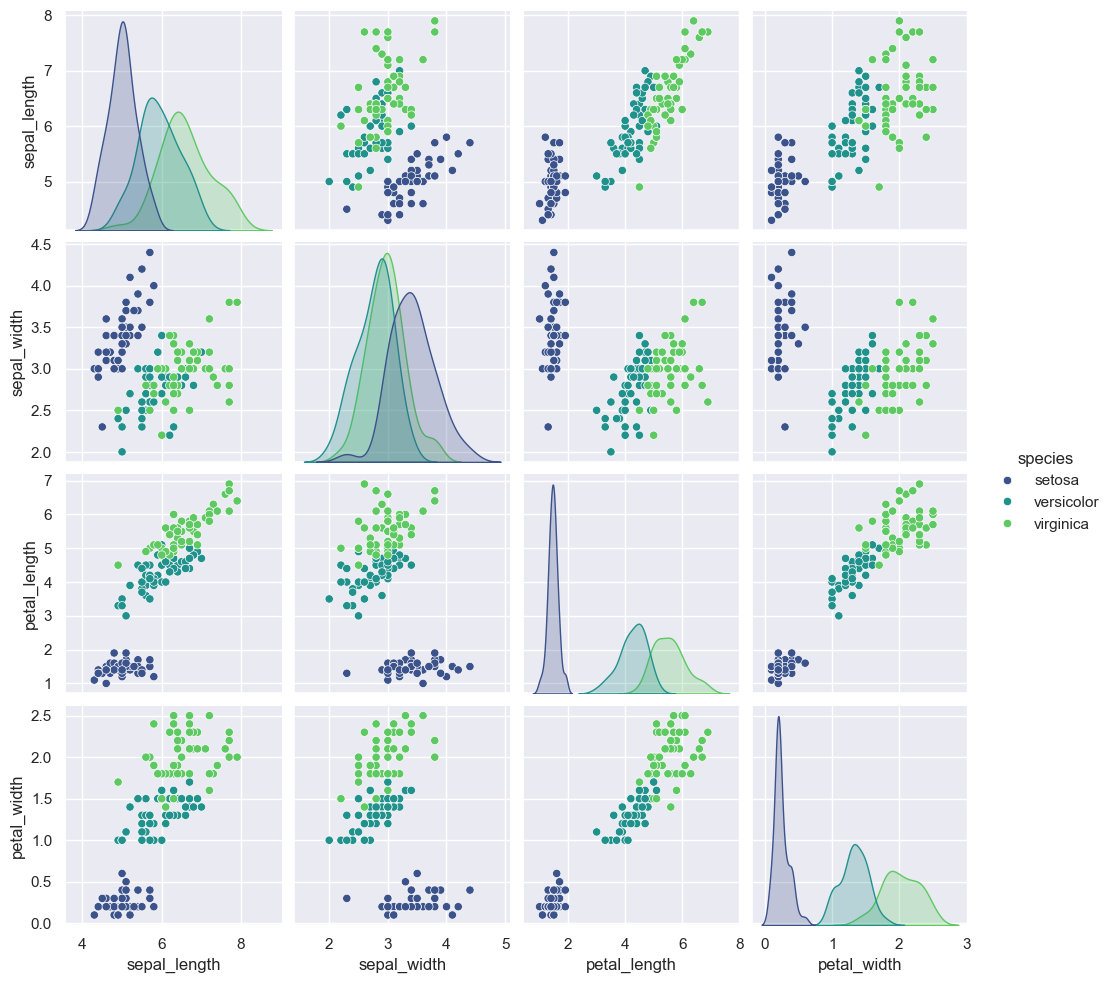

In [73]:
sns.pairplot(data = resultado, hue = 'species', palette = 'viridis')

## 7. 📊 Conclusão

Este EDA confirmou que o dataset Iris contém 3 espécies distintas, identificadas por meio da exploração inicial, visualizações como pair plots e clustering com K-Means.

A análise revelou padrões claros nas variáveis de comprimento e largura de pétalas e sépalas, com uma separabilidade consistente entre Setosa, Versicolor e Virginica, apesar de pequenos outliers e sobreposições.

Esses insights foram fundamentais para o projeto de Machine Learning (`FloralSpecies-ML`), onde modelos como SVM e KNN alcançaram até 97% de acurácia ao classificar as espécies, especialmente após tratar outliers.

Assim, o trabalho exploratório não apenas validou a estrutura do dataset, mas também preparou uma base sólida para soluções preditivas.